# Using TensorFlow Learning & TensorFlow 2 to classify different Dog Breeds

- Type of problem: **Multi-class image clssification**
- Source Data from Kaggle: **https://www.kaggle.com/c/dog-breed-identification/overview**

Steps of problem solving:

1- **Get data ready (download data from kaggle, store, import)**

2- **Prepare the data (preprocessing)**
  - For preprocessing our data, we're going to use TensorFlow 2.x. The whole premise here is to get our data into Tensors (arrays of numbers which can be run on GPUs) and then allow a machine learning model to find patterns between them.

3- **Choose and fit/train a model**
  - **TensorFlow Hub**
    - For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub.
    - The **process of using a pretrained model and adapting it to your own problem is called transfer learning**. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.
  - **tf.keras.applications**
  - **TensorBoard**
  - **EarlyStopping**

4- **Evaluating the model (make prediction, comparing the model with ground truth labels)**

5- **Improving the model (Start from 1000 images and then improve to more)**

6- **Savem share and reload our model**

## Get our workspace ready

In [130]:
# Import TensorFlow & TF Hub in Colab
import tensorflow as tf
import tensorflow_hub as hub

# show the versions of the TF and TF Hub
print('TF version: ', tf.__version__)
print('TF Hub version:', hub.__version__)

# Check for GPU availability
print("GPU", "Available!" if tf.config.list_physical_devices('GPU') else "Not available")

TF version:  2.12.0
TF Hub version: 0.13.0
GPU Not available


## 1- Get our data ready

### 1-1- Download data

In [131]:
## Unziping data with magic dunction `!unzip`
#!unzip  "/content/drive/MyDrive/Dog-Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog-Vision/"

In [132]:
# Checking tha labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog-Vision/labels.csv")

In [133]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [134]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


<Axes: >

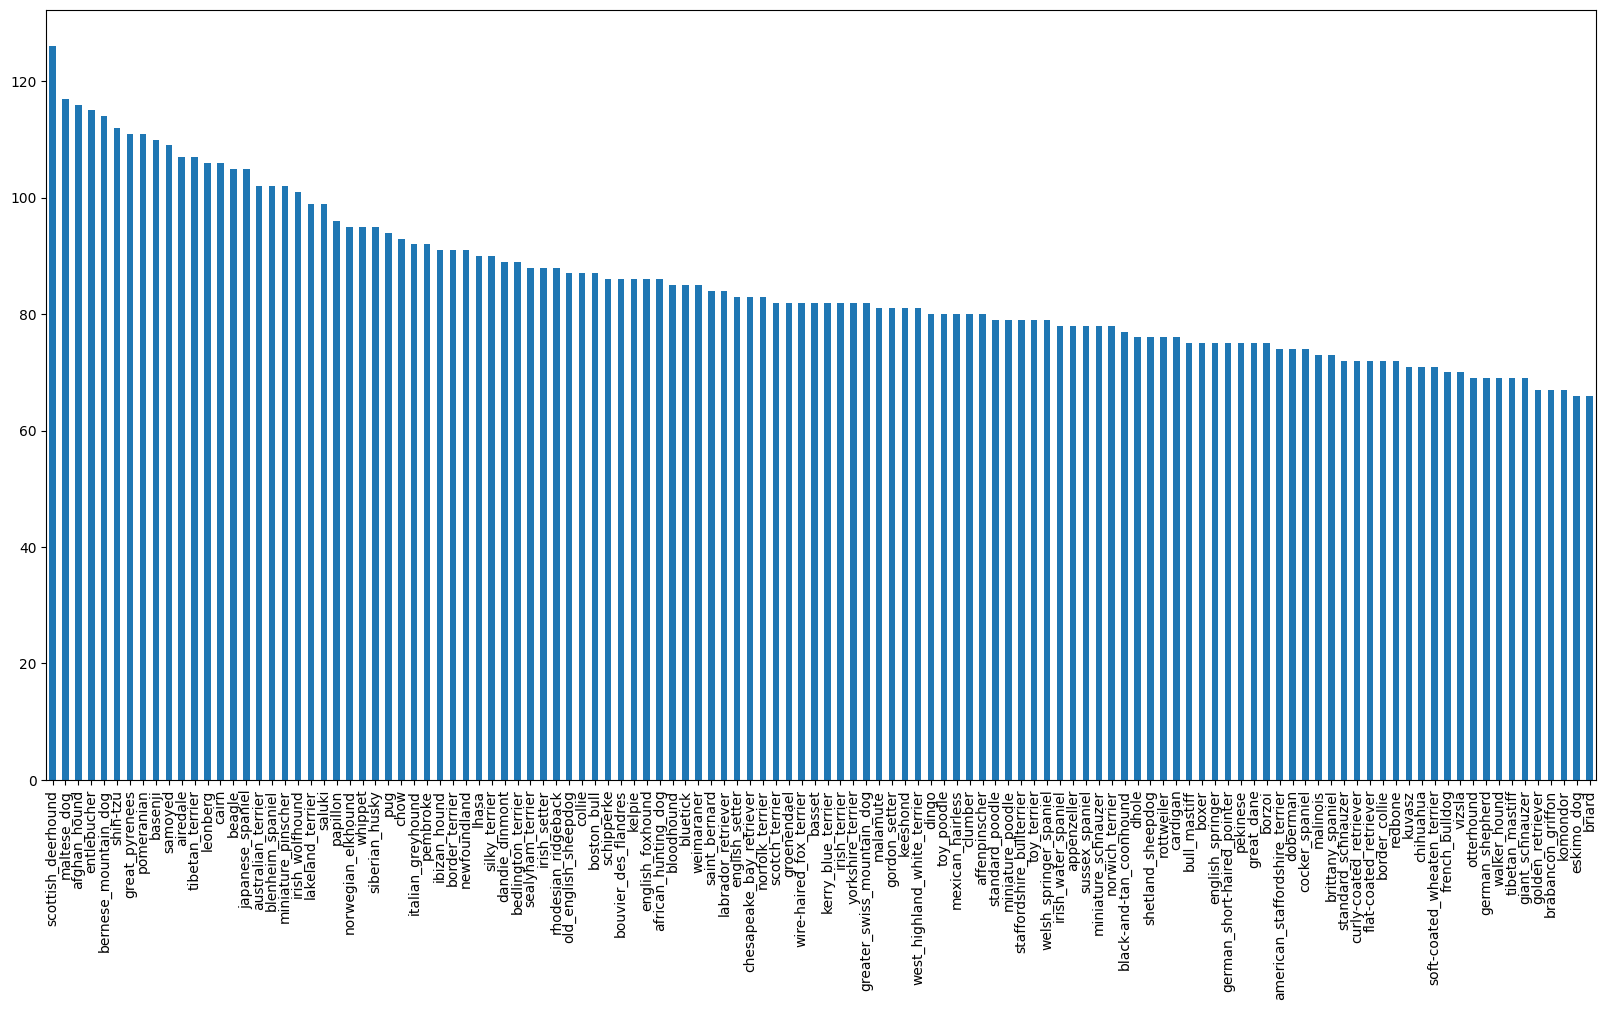

In [135]:
# How many images in each breed
labels_csv["breed"].value_counts().plot(kind = "bar", figsize=(20, 10))

In [136]:
# Create a path name from our image
filenames = ["drive/MyDrive/Dog-Vision/train/"+ fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [137]:
# Check list of images in a direction
import os
os.listdir("drive/MyDrive/Dog-Vision/train/")[:10]

['de2c9754f0687fc8d0922b990d274777.jpg',
 'dfed11d5d68bd13d8587bd3047ef8e5c.jpg',
 'e0f1273a2ed4e1790bd92880d0651893.jpg',
 'e89f2129dc5830c7ba5114c7c79ee459.jpg',
 'e062d6b642e375e2b3d15057f441163a.jpg',
 'ded35f1917f66ed6cb3179e163406aec.jpg',
 'e236f0b66a5a700022dbed8458e81d26.jpg',
 'de41f775f1b52a040d0965e0923bc983.jpg',
 'e0c759008208229026ae7aeb04da7a75.jpg',
 'e87a86f29c8709e81bbea9c8139d739c.jpg']

In [138]:
# Check whether the number filename matches the number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog-Vision/train/"))==len(filenames):
  print("The number of filenames match the number of actual image file!")
else:
  print("The number of filenames do not match the number of actual image file!")

The number of filenames match the number of actual image file!


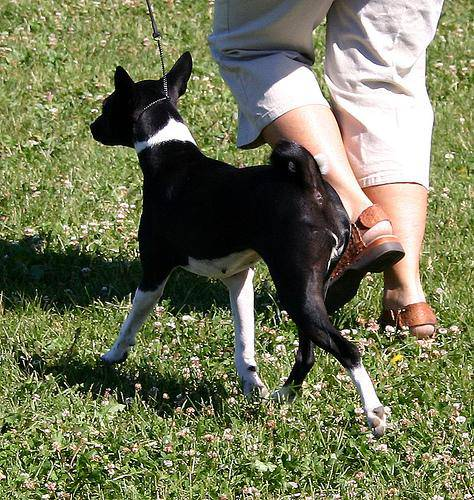

In [139]:
# View an image from direction
from IPython.display import Image
Image("drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg")

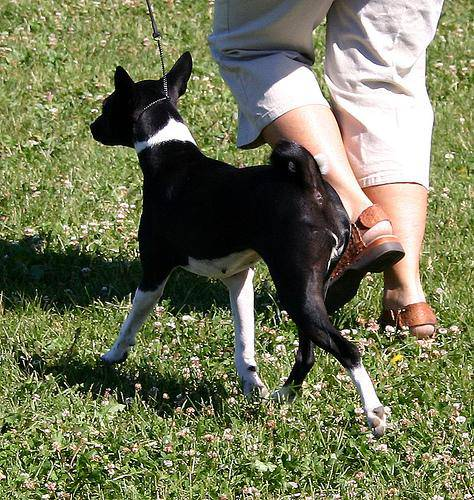

In [140]:
# Check file directory from file path
Image(filenames[8])

Sine we've now got our training images filepaths in a list, let's prepare our labels. 

In [141]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [142]:
# Check the number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels match the number of filenames")
else:
  print("Number of labels Do not match the number of filenames")

Number of labels match the number of filenames


In [143]:
# Find the unique value of breeds
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [144]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [145]:
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)

10222

In [146]:
# Turning boolean array into integers

print(labels[0]) # the original label
print(np.where(labels[0] == unique_breeds)) # Index where label occures
print(np.argmax(labels[0] == unique_breeds)) # Index where label occures in boolean array
print(boolean_labels[0].argmax()) # Index where label occures in boolean array
print(boolean_labels[0].astype(int)) # There will be a 1 where the sample label occures

boston_bull
(array([19]),)
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


  ### Create our own validation set

In [147]:
X = filenames
y = boolean_labels

Let's setup experiment data set

In [148]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [149]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split the data into train and validation of total NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [150]:
# LEt's have a geez at the training data
X_train[0], y_train[0]

('drive/MyDrive/Dog-Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
     

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. **Takes an image filename as input.**
2. **Uses TensorFlow to read the file and save it to a variable, `image`.**
3. **Turn our `image` (a jpeg file) into Tensors.**
4. **Normalize our image (convert colour channel values from 0-255 to 0-1)**
5. **Resize the `image` to be of shape (224, 224).**
6. **Return the modified `image`.**

Ok, now let's build that function we were talking about.

In [151]:
# Convert Image into NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[0])
image.shape

# # One can use the bellow code instead!!! (in stackoverflow many people recommend this method!!!!)
# import cv2
# im = cv2.imread(filenames[0])
# im.shape

(375, 500, 3)

In [152]:
image.max(), image.min()

(255, 0)

In [153]:
# Turn image into a Tensor
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [154]:
# Define Image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into Tensor.
  """
  # 1- Read in an image file
  image = tf.io.read_file(image_path)
  # 2- Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3) # Channel=3 colour channels (Red, Green, Blue)
  # 3- Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  # 4- Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])
  
  return image

In [155]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Take an image path and the associated label,
  process the image and return the tuple (image, label)
  """
  image = process_image(image_path)

  return image, label

In [156]:
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

### Turn data into batches

In [157]:
# Define the batch size (32 is a good start)
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  - Creates batches of data out of image (X) and label (y) pairs.
  - Shuffles the data if it's training data but doesn't if it's validation data.
  - Accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels.
  if test_data:
    print("Create test data batches...")
    # 1- Turns filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    # 2- Create (image) tuples (this also turns the image path into a preprocessed image)
    data = data.map(process_image)
    # 3- Turn the training data into batches
    data_batch = data.batch(batch_size)

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Create validation data batches...")
    # 1- Turns filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    # 2- Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)
    # 3- Turn the training data into batches
    data_batch = data.batch(batch_size)

  else:
    print("Create training data batches...")
    # 1- Turns filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    # 2- Shuffling pathnames and labels before mapping image processor function is faster than shuffling images.
    data = data.shuffle(buffer_size=len(x))
    # 3- Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label) # we use `get_image_label` because training data have labels!
    # 4- Turn the training data into batches
    data_batch = data.batch(batch_size)

  return data_batch

In [158]:
# Create training data and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Create training data batches...
Create validation data batches...


In [114]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualize the data batches
Our data is now in batches, however, these can be a little hard to understand/ comperehend, let's visualize them. 

In [115]:
import matplotlib.pyplot as plt

In [116]:
# Create a function for viewing images
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from a data batch
  """

  # Set the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 
  for i in range(25):
    # Create subplots (5 rows and 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label
    plt.title(unique_breeds[train_labels[i].argmax()])
    plt.axis("off")

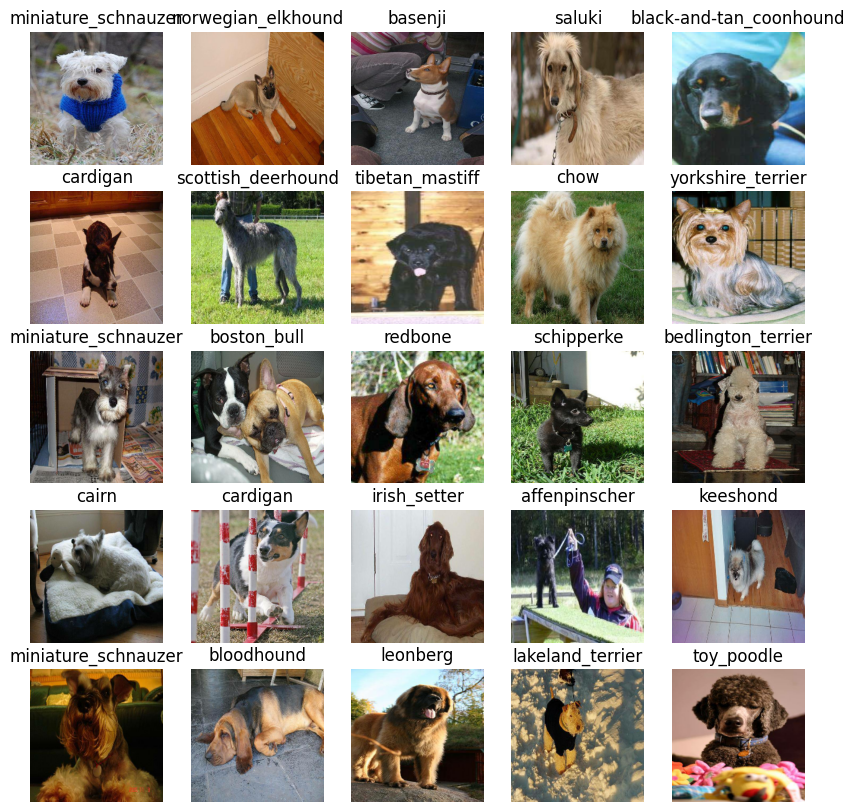

In [117]:
# As our data in batches, we need to unbatch it first
# We will get the first batch by using iterator of next()
train_images, train_labels = next(train_data.as_numpy_iterator())

show_25_images(train_images, train_labels)

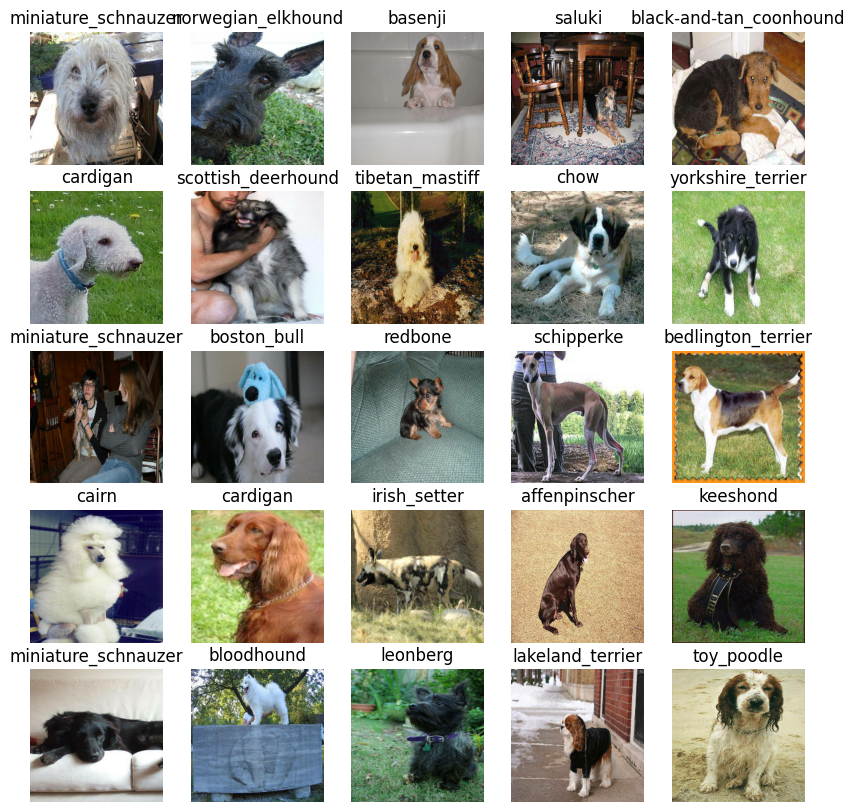

In [118]:
# Let's visualize the data in the validation batsetch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Bulding a model

Before we build a model, there are a few things we need to define. 
* The input shape (our image shape, in the form of Tensors) to our model .
* The output shape (image labels, in the form of Tensors) of our model.
* the URL of the model we want to use, from TensorFlow Hub:  
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [119]:
# Setup the input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup the model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Defining a **deep learning model in Keras** can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

We'll take a look at the code first, then dicuss each part.

all of the above steps are in the link bellow:
https://www.tensorflow.org/guide/keras/sequential_model

In [120]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building the model with: ", model_url)

  # 1- Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url), # Layer 1, Input layer
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2, output layer.
  ])
  # 2- Compile the model
  loss_func = tf.keras.losses.CategoricalCrossentropy() # Types of Loss functions: https://keras.io/api/losses/
  optim = tf.keras.optimizers.Adam()                # Default value for Adam(learning_rate=0.01) See another Optimizer: https://keras.io/api/optimizers/
  #metric = tf.keras.metrics.Accuracy()                 # See metrics: https://keras.io/api/metrics/
  model.compile(
      loss=loss_func,
      optimizer=optim,
      metrics=["accuracy"] 
  )

  # 3- Build the model
  model.build(input_shape)

  return model

In [121]:
model = create_model()
model.summary()

Building the model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_7 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### How to choose Activation and Loss Functions:

**For Multi-class Classification:**
  * Activation: softmax
  * Loss: Categorical Crossentropy

**For Binary Classification:**
  * Activation: Sigmoid
  * Loss: Binary Crossentropy

## Creating callbacks

The two callbacks we're going to add are a:
- **TensorBoard callback** and 
- **Early Stopping callback**.

#### TensorBoard Callback
see link about keras callbacks: https://keras.io/api/callbacks/

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:
1. **Load the TensorBoard notebook extension.**
2. **Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.**
3. **Visualize the our models training logs using the `%tensorboard` magic function (we'll do this model training).**

In [122]:
# Load the Tensorboard extention
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [123]:
import datetime

In [124]:
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing
  logdir = os.path.join("drive/MyDrive/Dog-Vision/logs",
                        # MAke the log get tracked whenever we use
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir)

#### Early Stopping Callback

[Early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) helps prevent overfitting by stopping a model when a certain evaluation metric stops improving.

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [125]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                 patience=3)

In [126]:
# Check the availability of the GPU
print("GPU", "available (YES!!!)" if tf.config.list_physical_devices("GPU") else "Not available :(")

GPU Not available :(


### Training a model (on a subset of data)

In [127]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Boom! We've got a GPU running and `NUM_EPOCHS` setup. Let's create a simple function which trains a model. The function will:
* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback()` (we do this here so it creates a log directory of the current date and time).
* Call the `fit()` function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [128]:
from keras.api._v2.keras import callbacks
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and returns the trained version.
  """

  # 1- Create a model
  model = create_model()

  # 2- Create a new TensorBoard session everytime we train the model
  tensorboard = create_tensorboard_callback()

  # 3- Fit the model to the data passing it the callbacks we created.
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  # 4- Return the fitted model
  return model

In [129]:
model = train_model()

Building the model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 69s 3s/step - loss: 4.5316 - accuracy: 0.1000 - val_loss: 3.5301 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 72s 3s/step - loss: 1.6372 - accuracy: 0.6862 - val_loss: 2.2520 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 79s 3s/step - loss: 0.5689 - accuracy: 0.9400 - val_loss: 1.7477 - val_accuracy: 0.5700
Epoch 4/100
17/25 [===================>..........] - ETA: 17s - loss: 0.2582 - accuracy: 0.9853

KeyboardInterrupt: ignored

#### Checking the TensorBoard logs

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog-Vision/logs

## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
# First prediction
index = 42
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

In [ ]:
# Turn prediction probability into their respective labels
def get_pred_label(prediction_probabilities):
  """
  Turns an array prediction probability into a label.
  """

  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probs.
pred_label = get_pred_label(predictions[81])
pred_label

**Let's make some functions to make these all a bit more visualize.**

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and images.
  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # 1- Get the pred label
  pred_label = get_pred_label(pred_prob)

  # 2- Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # 3- Change the colour
  

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=100)

In [ ]:
predictions.shape

In [ ]:
val_labels.shape

In [ ]:
val_images.shape